In [6]:
import pandas as pd

#"C:\Users\anton\Downloads\TAVOLE-moneta\Coeff_2002-2021.xlsx"

# Specify the path to the Excel file
excel_file = 'Coeff_2022.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Display the DataFrame
df
# Unnamed: 1	Unnamed: 2, Unnamed: 4	Unnamed: 5 , Unnamed: 7	Unnamed: 8

df_extracted = df[5:]
df_concatenated_y = pd.concat([df_extracted['Unnamed: 1'], df_extracted['Unnamed: 4'], df_extracted['Unnamed: 7'],df_extracted['Unnamed: 10'],df_extracted['Unnamed: 13']], axis=0)
df_concatenated_coeff = pd.concat([df_extracted['Unnamed: 2'], df_extracted['Unnamed: 5'], df_extracted['Unnamed: 8'], df_extracted['Unnamed: 11'], df_extracted['Unnamed: 14']], axis=0)

df_coeff = pd.DataFrame({'Coeff': df_concatenated_coeff.values, 'Y': df_concatenated_y.values})
df_coeff = df_coeff.dropna(subset=['Coeff'])
# df_coeff

last = 0
for i in range(0, len(df_coeff['Y'])):
    if len(str(df_coeff['Y'][i])) == 4:
        last = str(df_coeff['Y'][i])[:2]
    if len(str(df_coeff['Y'][i])) == 2:
        # print(df_coeff['Y'][i])
        df_coeff['Y'][i] = last + str(df_coeff['Y'][i])
        # print(df_coeff['Y'][i])

df_coeff['Y'] = df_coeff['Y'].astype(int)
df_coeff['Coeff'] = df_coeff['Coeff'].astype(float)

df_coeff = df_coeff[df_coeff['Y'] > 1999]

df_coeff
df_coeff['Coeff'] = df_coeff["Coeff"].apply(lambda x: 31530/x)
df_coeff


,Coeff,Y
139,1.4770,2000
140,1.4385,2001
141,1.4044,2002
142,1.3707,2003
143,1.3440,2004
144,1.3214,2005
145,1.2956,2006
146,1.2737,2007
147,1.2338,2008
148,1.2247,2009


In [7]:

df_coeff.to_csv("Inflation.csv", index=False)


# Salary

<Axes: xlabel='Y'>

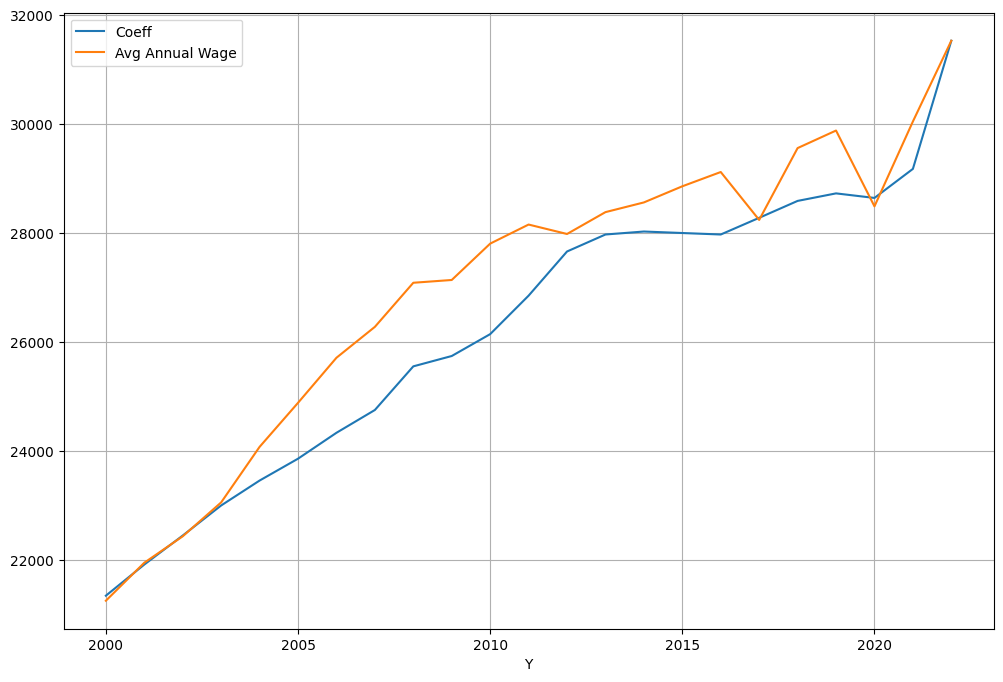

In [116]:
import pandas as pd


excel_file = 'C:/Users/anton/Downloads/TAVOLE-moneta/statistic_id416213_average-annual-wage-in-italy-2000-2022.xlsx'
df_wage_y = pd.read_excel(excel_file, sheet_name='Data')
df_wage_y = df_wage_y.drop(columns=['Unnamed: 0'])
df_wage_y = df_wage_y.rename(columns={'Unnamed: 1': 'Y'})
df_wage_y = df_wage_y.rename(columns={'Unnamed: 2': 'Avg Annual Wage'})
df_wage_y =df_wage_y[4:]
# int32
df_wage_y['Y'] = df_wage_y['Y'].astype(int)
df_wage_y['Avg Annual Wage'] = df_wage_y['Avg Annual Wage'].astype(float)
df_wage_y

df_merge = pd.concat([df_coeff, df_wage_y], axis=1)
df_merge = pd.merge(df_coeff, df_wage_y, on='Y')



df_merge.plot(x='Y', y=['Coeff', 'Avg Annual Wage'], figsize=(12, 8), grid=True)


# df_wage_y  # 4	2000	21255.0
# df_wage_y.plot(x='Anno', y='Avg Annual Wage', figsize=(12, 8), grid=True)
# df_coeff.plot(x='Y', y='Coeff', figsize=(12, 8), grid=True)


